<a href="https://colab.research.google.com/github/Kan4me/AnaliseTrybe/blob/master/EDA_Trybe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analyst: desafio técnico Trybe

* Realizar uma EDA (<i>Exploratory Data Analysis</i>) de um conjunto de dados de domímino público
* Linguagem selecionada: Python
* Apresentação das análises: GitHub 

# Contexo das análises

* Público-alvo: Conselho-Diretor da Empresa OnOil LTDA (fícticia) revendedora de combustíveis  na Região Sudeste.

* Objetivos: Análise de dados para definir estratégias de expansão de atuação nas demais regiões do País.

* Hipóteses:

> 1.   Região Sudeste possui o maior número de postos analisados e, como consequencia, tal região possui o menor preço médio de revenda geral dos combustíveis;
> 2.   O preço médio de revenda geral dos combustíveis é maior na região Norte por possuir a menor malha rodoviária do País;
> 3.   Como a Região Norte possui a menor malha rodiviária do País, a tendência é que tal região possua menos postos analisados;
> 4.   Alta de preços dos produtos foi acentuada em 2018 devido a Greve dos caminhoneiros;
> 5.   Combustível para veículos automotores mais barato: GNV;
> 6.   Combustível para veículos automotores mais caro: Gasolina comum.


# Informações Base de dados

* Série histórica do levantamento de preços e de margens de comercialização de combustíveis da [Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP)](http://www.anp.gov.br/precos-e-defesa-da-concorrencia/precos/levantamento-de-precos/serie-historica-do-levantamento-de-precos-e-de-margens-de-comercializacao-de-combustiveis) .

* Período da Série Histórica: Janeiro/2013 a Julho/2020 por UF.

* Combustíveis analisados: 
> 1.   Etanol hidratado - preço Litro
> 2.   Gasolina Comum - preço Litro
> 3.   GLP (Gás Liquefeito de Petróleo) - preço 13kg 
> 4.   GNV (Gás Natural Veicular) - preço Metro cúbico
> 5.   Óleo Diesel - preço Litro
> 6.   Óleo Diesel S10 - preço Litro

* Segregação das análises: Região e Ano.

# Notas Base de dados

* A limpeza inicial da base de dados foi feita com auxílio do Excel, que consistiu em excluir as colunas com eventuais entradas nulas e notas explicativas.
 

* Notas explicativas:
> 1.   Entre 30-07-2017 e 30-12-2017, a abrangência geográfica da pesquisa foi reduzida de 501 para 459 municípios, distribuídos da seguinte forma: as 26 capitais e o Distrito Federal pesquisados semanalmente e outros 432 municípios pesquisados quinzenalmente, alternando-se a cada semana um determinado grupo (Grupo A com as 27 capitais mais 215 municípios, totalizando 242 localidades, e Grupo B com as 27 capitais e outros 217 municípios, reunindo 244 localidades). [Clique aqui](http://www.anp.gov.br/precos-e-defesa-da-concorrencia/precos/levantamento-de-precos) para mais informações;
> 2.   Entre 27-05-2018 e 02-06-2018, o quantitativo de revendas com combustível disponível pesquisadas foi reduzido em torno de 85% em função dos impactos gerados pela greve dos caminhoneiros.

# EDA (<i>Exploratory Data Analysis</i>)

O estudo proposto foi divido em 3 (três) partes:

* Parte 1: Instalação de bibliotecas para carregar a base de dados e realizar as análises, análises globais e manipulações;
* Parte 2: Análise Descritiva; 
* Parte 3: Análise Gráfica.

# Parte 1

* Conexão Google Colab com o Google Drive de interesse:

In [92]:
# pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [93]:
#Mounted Google Drive de interesse
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


* Instalação das bibliotecas de interesse:

In [95]:
# Configuração das bibliotecas de interesse

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter


* Carregamento do arquivo de interesse para análises:

In [96]:
#Carregar arquivo XLSX de interesse

base_dados = pd.read_excel('/content/drive/My Drive/AnaliseTrybe/Analise_combustiveis.xlsx')
base_dados.head()

,MÊS,PRODUTO,REGIÃO,ESTADO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA
0,2013-01-01,ÓLEO DIESEL,NORTE,ACRE,258,R$/l,2.663,0.137,2.38,2.950
1,2013-01-01,ÓLEO DIESEL,NORDESTE,ALAGOAS,372,R$/l,2.118,0.044,2.02,2.229
2,2013-01-01,ÓLEO DIESEL,NORTE,AMAPA,149,R$/l,2.231,0.108,2.16,2.550
3,2013-01-01,ÓLEO DIESEL,NORTE,AMAZONAS,508,R$/l,2.222,0.120,2.02,2.620
4,2013-01-01,ÓLEO DIESEL,NORDESTE,BAHIA,1851,R$/l,2.086,0.087,1.89,2.399


* Manipulação: Criação das colunas Ano e Mês:

In [97]:
#Extração Mês e Ano da base de dados

base_dados["ANO"],  base_dados["MES"] = (base_dados["MÊS"].dt.year, 
                                        base_dados["MÊS"].dt.month)

base_dados.head()

,MÊS,PRODUTO,REGIÃO,ESTADO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,ANO,MES
0,2013-01-01,ÓLEO DIESEL,NORTE,ACRE,258,R$/l,2.663,0.137,2.38,2.950,2013,1
1,2013-01-01,ÓLEO DIESEL,NORDESTE,ALAGOAS,372,R$/l,2.118,0.044,2.02,2.229,2013,1
2,2013-01-01,ÓLEO DIESEL,NORTE,AMAPA,149,R$/l,2.231,0.108,2.16,2.550,2013,1
3,2013-01-01,ÓLEO DIESEL,NORTE,AMAZONAS,508,R$/l,2.222,0.120,2.02,2.620,2013,1
4,2013-01-01,ÓLEO DIESEL,NORDESTE,BAHIA,1851,R$/l,2.086,0.087,1.89,2.399,2013,1


* Análises globais:

In [98]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13892 entries, 0 to 13891
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   MÊS                           13892 non-null  datetime64[ns]
 1   PRODUTO                       13892 non-null  object        
 2   REGIÃO                        13892 non-null  object        
 3   ESTADO                        13892 non-null  object        
 4   NÚMERO DE POSTOS PESQUISADOS  13892 non-null  int64         
 5   UNIDADE DE MEDIDA             13892 non-null  object        
 6   PREÇO MÉDIO REVENDA           13892 non-null  float64       
 7   DESVIO PADRÃO REVENDA         13892 non-null  float64       
 8   PREÇO MÍNIMO REVENDA          13892 non-null  float64       
 9   PREÇO MÁXIMO REVENDA          13892 non-null  float64       
 10  ANO                           13892 non-null  int64         
 11  MES                         

Percebe-se que as variáveis REGIÃO e PRODUTO são as mais indicadas para segregar as extrações, dado que são variáveis do tipo object.


In [99]:
base_dados.mean()

NÚMERO DE POSTOS PESQUISADOS     751.243018
PREÇO MÉDIO REVENDA               12.911362
DESVIO PADRÃO REVENDA              0.863718
PREÇO MÍNIMO REVENDA              10.887059
PREÇO MÁXIMO REVENDA              15.292880
ANO                             2016.302044
MES                                6.306939
dtype: float64

Os valores médios dos 79 (setenta e nove) meses da base de dados são:
*  751 postos postos analisados;
*  Preço médio de todos os produtos corresponde a 12,91 reais;
*  O desvio padrão médio do preço de todos os produtos corresponde a 0,86 reais, ou seja, na média, o preço dos produtos varia 0,86 reais para mais ou para menos; 
*  Na média, a amplitude entre o preço mínimo e o preço máximo de revenda de todos os produtos é de aproximadamente 5 reais. 


O desvio padrão médio geral do preço dos produtos abaixo de 1 indica que os preços médios tendem a ser homogêneos em torno da média.

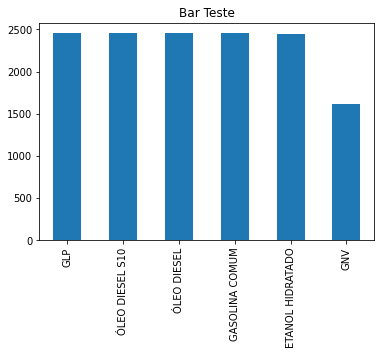

In [100]:
plot1 = base_dados.PRODUTO.value_counts().plot(kind='bar', title = "Bar Teste");


Todos os produtos tiveram aproximadamente 2.500 (duas mil e quinhentas) entradas no período analisado, exceto o produto GNV que teve aproximadamente 1.500 (mil e quinhentas) entradas.

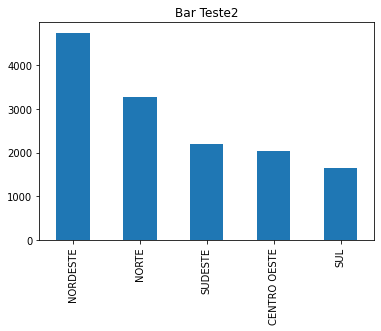

In [101]:
plot2 = base_dados.REGIÃO.value_counts().plot(kind='bar', title = "Bar Teste2");


A região com mais entradas no período analisado é a Região Nordeste, com mais de 4.700 (quatro mil e setecentas). Já a região com menos entradas é a Sul, com aproximadamente 1.600 (mil e seiscentas).

# Parte 2


In [102]:
#Análise descritiva Número de postos pesquisados por Ano e Região

base_dados.groupby(["ANO", "REGIÃO"])[["NÚMERO DE POSTOS PESQUISADOS"]].describe()


NÚMERO DE POSTOS PESQUISADOS               ...                  
                                         count         mean  ...      75%      max
ANO  REGIÃO                                                  ...                  
2013 CENTRO OESTE                        276.0   537.793478  ...   640.25   2453.0
     NORDESTE                            624.0   522.653846  ...   592.50   2085.0
     NORTE                               432.0   286.671296  ...   401.25   1082.0
     SUDESTE                             288.0  2973.788194  ...  4021.75  11736.0
     SUL                                 216.0  1522.865741  ...  2356.50   3573.0
2014 CENTRO OESTE                        276.0   552.623188  ...   668.75   2454.0
     NORDESTE                            626.0   528.862620  ...   587.50   2073.0
     NORTE                               432.0   287.254630  ...   391.25   1049.0
     SUDESTE                             292.0  3016.315068  ...  4144.25  11883.0
     SUL                                 217.0  1549.405530  ...  2258.00   3551.0
2015 CENTRO OESTE                        276.0   457.221014  ...   568.00   2142.0
     NORDESTE                            625.0   429.723200  ...   529.00   1918.0
     NORTE                               433.0   221.988453  ...   305.00    948.0
     SUDESTE                             288.0  2351.864583  ...  3426.50  11442.0
     SUL                                 216.0  1184.236111  ...  1621.50   3240.0
2016 CENTRO OESTE                        269.0   428.345725  ...   643.00   1385.0
     NORDESTE                            627.0   397.365231  ...   616.00   1615.0
     NORTE                               433.0   192.392610  ...   273.00    959.0
     SUDESTE                             288.0  2063.451389  ...  2709.75   8121.0
     SUL                                 216.0  1017.949074  ...  1448.00   2641.0
2017 CENTRO OESTE                        264.0   365.215909  ...   511.00   1385.0
     NORDESTE                            626.0   320.293930  ...   419.75   1644.0
     NORTE                               429.0   163.375291  ...   211.00    966.0
     SUDESTE                             288.0  1634.003472  ...  2198.00   8059.0
     SUL                                 216.0   799.291667  ...  1060.25   2646.0
2018 CENTRO OESTE                        261.0   432.685824  ...   633.00   1128.0
     NORDESTE                            628.0   360.866242  ...   524.25   1632.0
     NORTE                               431.0   185.429234  ...   248.50    781.0
     SUDESTE                             288.0  1955.468750  ...  2465.75   7862.0
     SUL                                 216.0   934.865741  ...  1431.75   2004.0
2019 CENTRO OESTE                        262.0   447.343511  ...   668.00   1167.0
     NORDESTE                            626.0   379.881789  ...   533.75   1670.0
     NORTE                               431.0   191.034803  ...   258.00    799.0
     SUDESTE                             288.0  2036.559028  ...  2544.00   8310.0
     SUL                                 216.0   963.083333  ...  1470.50   2013.0
2020 CENTRO OESTE                        157.0   435.687898  ...   651.00   1091.0
     NORDESTE                            365.0   378.641096  ...   524.00   1575.0
     NORTE                               256.0   184.644531  ...   253.00    782.0
     SUDESTE                             168.0  2018.446429  ...  2586.50   7647.0
     SUL                                 126.0   970.150794  ...  1488.00   1876.0

[40 rows x 8 columns]

As principais características da variável Número de postos pesquisados relação ao Ano e Região são:

* Independente do ano, a região com mais entradas de número de postos analisados é a Região Nordeste. Em 2018, o número de entradas da região citada chega a ser quase 3x maior que a Região Sul, que corresponde a região com menos entradas desse ano.

* O número máximo de postos analisados corresponde a 11.883 (onze mil e oitocentos e oitenta e três), que ocorreu em 2014 na Região Sudeste.

* A Região Sul é a única região que independente do ano, o valor mínimo de postos analisados corresponde a 2 (dois), que ocorreu em 2014. As demais regiões tiveram o valor 1 (um) como mínimo pelo menos uma vez ao longo dos anos.

* A amplitude do desvio padrão do número de postos analisados das regiões ao longo dos anos tem os limites aproximadamente de 140 (cento e quarenta) e 3.157 (três mil e cento e cinquenta e sete).

* A maior média de postos analisados é 3.016 (três mil e dezesseis), que ocorreu na Região Sudeste em 2014. 

In [103]:
#Análise descritiva Preço médio revenda por Ano e Região

base_dados.groupby(["ANO", "REGIÃO"])[["PREÇO MÉDIO REVENDA"]].describe()

PREÇO MÉDIO REVENDA             ...                 
                                count       mean  ...      75%     max
ANO  REGIÃO                                       ...                 
2013 CENTRO OESTE               276.0   9.906728  ...  2.99000  52.556
     NORDESTE                   624.0   8.865883  ...  2.85975  47.797
     NORTE                      432.0  10.900785  ...  3.05725  51.090
     SUDESTE                    288.0   8.667674  ...  2.88675  45.830
     SUL                        216.0   8.895056  ...  2.84650  42.770
2014 CENTRO OESTE               276.0  10.426264  ...  3.11750  55.639
     NORDESTE                   626.0   9.425000  ...  2.97150  49.207
     NORTE                      432.0  11.715352  ...  3.20650  54.607
     SUDESTE                    292.0   9.080493  ...  2.97950  48.206
     SUL                        217.0   9.168659  ...  2.96200  44.287
2015 CENTRO OESTE               276.0  11.781178  ...  3.43275  73.076
     NORDESTE                   625.0  10.528197  ...  3.36000  60.358
     NORTE                      433.0  13.206432  ...  3.68900  69.285
     SUDESTE                    288.0  10.236083  ...  3.36775  58.623
     SUL                        216.0  10.342139  ...  3.28400  57.205
2016 CENTRO OESTE               269.0  13.810885  ...  3.71700  77.042
     NORDESTE                   627.0  11.700568  ...  3.74450  63.132
     NORTE                      433.0  14.603416  ...  3.99700  70.060
     SUDESTE                    288.0  11.276049  ...  3.68425  58.132
     SUL                        216.0  11.728764  ...  3.65800  58.802
2017 CENTRO OESTE               264.0  15.107712  ...  3.81700  95.529
     NORDESTE                   626.0  12.589661  ...  3.77850  78.157
     NORTE                      429.0  15.913476  ...  4.13400  84.375
     SUDESTE                    288.0  12.248517  ...  3.83250  68.511
     SUL                        216.0  12.461972  ...  3.75975  67.208
2018 CENTRO OESTE               261.0  17.423889  ...  4.57800  98.041
     NORDESTE                   628.0  14.537029  ...  4.43825  78.050
     NORTE                      431.0  18.206258  ...  4.72300  85.915
     SUDESTE                    288.0  13.855622  ...  4.50075  71.904
     SUL                        216.0  14.287704  ...  4.29175  69.949
2019 CENTRO OESTE               262.0  17.346290  ...  4.46275  97.551
     NORDESTE                   626.0  14.840399  ...  4.48325  75.207
     NORTE                      431.0  18.500986  ...  4.66600  84.488
     SUDESTE                    288.0  14.140802  ...  4.56100  70.390
     SUL                        216.0  14.643069  ...  4.23350  71.588
2020 CENTRO OESTE               157.0  16.705962  ...  4.34600  96.734
     NORDESTE                   365.0  14.862658  ...  4.31000  76.463
     NORTE                      256.0  18.583660  ...  4.63025  85.552
     SUDESTE                    168.0  14.160655  ...  4.37175  70.883
     SUL                        126.0  14.757389  ...  4.28150  72.496

[40 rows x 8 columns]

As principais características da variável Preço médio revenda pesquisados relação ao Ano e Região são:

* O maior preço médio de revenda dos produtos foi de 98,04 reais, que ocorreu em 2018 na Região Centro-Oeste.

* Em 2013, a Região Sudeste apresentou o menor valor médio de revenda, que corresponde a 1,61 reais. 

* A amplitude do desvio padrão do valor médio de revenda das regiões ao longo dos anos tem os limites aproximadamente de 14,20 reais e 30,50 reais.

* A maior média do valor médio de revenda analisados é 18,58	reais, que ocorreu na Região Norte em 2020. 

As tabelas abaixo considerando a variável Produto apresentam os resultados similares aos descritos acima para a variável Preço médio de revenda.
Tais tabelas foram desenvolvidas para a Empresa possuir outras possibilidades de apresentação de tabelas de análise do Preço médio de revenda. 

In [104]:
#Análise descritiva Preço médio revenda por Produto e Região

base_dados.groupby(["PRODUTO", "REGIÃO"])["PREÇO MÉDIO REVENDA"].describe()

count       mean  ...       75%     max
PRODUTO          REGIÃO                          ...                  
ETANOL HIDRATADO CENTRO OESTE  364.0   2.686799  ...   3.08750   3.662
                 NORDESTE      819.0   2.984040  ...   3.35900   3.844
                 NORTE         624.0   3.237625  ...   3.68400   4.240
                 SUDESTE       364.0   2.804824  ...   3.24125   4.247
                 SUL           273.0   2.968498  ...   3.47900   4.408
GASOLINA COMUM   CENTRO OESTE  364.0   3.725173  ...   4.20850   4.950
                 NORDESTE      819.0   3.684521  ...   4.23800   4.879
                 NORTE         637.0   3.811235  ...   4.23100   5.353
                 SUDESTE       364.0   3.739585  ...   4.27375   5.092
                 SUL           273.0   3.628766  ...   4.09200   4.930
GLP              CENTRO OESTE  364.0  63.290357  ...  72.63700  98.041
                 NORDESTE      819.0  54.847136  ...  65.34500  78.157
                 NORTE         637.0  63.160706  ...  76.60500  85.915
                 SUDESTE       364.0  54.504657  ...  64.33225  71.904
                 SUL           273.0  56.292590  ...  69.01600  72.496
GNV              CENTRO OESTE  221.0   2.500941  ...   2.69900   4.090
                 NORDESTE      652.0   2.541311  ...   2.98900   4.779
                 NORTE         105.0   2.779743  ...   3.16800   4.599
                 SUDESTE       368.0   2.338986  ...   2.79400   3.551
                 SUL           274.0   2.476967  ...   2.79875   3.648
ÓLEO DIESEL      CENTRO OESTE  364.0   3.167766  ...   3.57125   4.077
                 NORDESTE      819.0   3.024611  ...   3.44550   3.921
                 NORTE         637.0   3.271221  ...   3.63100   4.799
                 SUDESTE       364.0   2.994654  ...   3.40175   3.856
                 SUL           273.0   2.923223  ...   3.26300   3.704
ÓLEO DIESEL S10  CENTRO OESTE  364.0   3.310030  ...   3.70700   4.130
                 NORDESTE      819.0   3.124096  ...   3.51250   3.994
                 NORTE         637.0   3.390752  ...   3.79200   4.680
                 SUDESTE       364.0   3.132308  ...   3.53750   3.946
                 SUL           273.0   3.050736  ...   3.36500   3.795

[30 rows x 8 columns]

In [105]:
#Análise Descritiva Preço médio Produto por Produto e Ano

base_dados.groupby(["PRODUTO", "ANO"])["PREÇO MÉDIO REVENDA"].describe()

count       mean       std  ...      50%       75%     max
PRODUTO          ANO                               ...                           
ETANOL HIDRATADO 2013  324.0   2.312108  0.212744  ...   2.3405   2.45525   2.761
                 2014  324.0   2.443000  0.238340  ...   2.4785   2.60250   2.966
                 2015  324.0   2.618389  0.295962  ...   2.6350   2.77225   3.557
                 2016  321.0   3.126623  0.321932  ...   3.1560   3.34500   3.747
                 2017  321.0   3.182776  0.342179  ...   3.2080   3.41300   3.890
                 2018  322.0   3.428009  0.347551  ...   3.4810   3.63900   4.240
                 2019  319.0   3.457476  0.376576  ...   3.5440   3.72300   4.257
                 2020  189.0   3.452243  0.415335  ...   3.4980   3.72800   4.408
GASOLINA COMUM   2013  324.0   2.914358  0.121201  ...   2.8975   2.99400   3.377
                 2014  324.0   3.033966  0.127178  ...   3.0165   3.11600   3.502
                 2015  324.0   3.418929  0.208394  ...   3.3940   3.53500   4.109
                 2016  324.0   3.748633  0.156369  ...   3.7405   3.86750   4.183
                 2017  324.0   3.814735  0.238255  ...   3.7825   3.96500   4.810
                 2018  324.0   4.436929  0.290019  ...   4.4085   4.65700   5.353
                 2019  324.0   4.409201  0.256809  ...   4.4365   4.57725   5.075
                 2020  189.0   4.240942  0.378546  ...   4.2480   4.55500   5.041
GLP              2013  324.0  42.343426  3.876997  ...  41.9615  44.79175  52.556
                 2014  324.0  44.923772  4.173245  ...  43.7150  47.82850  55.639
                 2015  324.0  50.547636  6.526685  ...  49.9150  54.19075  73.076
                 2016  324.0  56.652444  6.237794  ...  55.9775  59.16800  77.042
                 2017  324.0  61.819460  7.849200  ...  60.5640  65.59450  95.529
                 2018  324.0  71.346219  7.504129  ...  69.7480  74.78025  98.041
                 2019  324.0  72.227957  7.118151  ...  70.2690  75.67675  97.551
                 2020  189.0  73.246032  7.497086  ...  71.2600  76.76600  96.734
GNV              2013  216.0   1.883250  0.142484  ...   1.8900   1.96700   2.250
                 2014  223.0   1.984511  0.167716  ...   1.9470   2.11000   2.460
                 2015  218.0   2.180596  0.212158  ...   2.1720   2.29550   2.899
                 2016  216.0   2.403606  0.257065  ...   2.3690   2.55225   4.020
                 2017  206.0   2.482626  0.245978  ...   2.4955   2.68850   3.039
                 2018  206.0   2.855612  0.354222  ...   2.8075   3.12900   3.890
                 2019  208.0   3.282149  0.336689  ...   3.1975   3.57425   4.559
                 2020  127.0   3.265441  0.368251  ...   3.2520   3.50700   4.779
ÓLEO DIESEL      2013  324.0   2.365630  0.148511  ...   2.3330   2.41825   3.011
                 2014  324.0   2.562963  0.149482  ...   2.5145   2.61525   3.164
                 2015  324.0   2.893685  0.179388  ...   2.8585   2.98500   3.588
                 2016  324.0   3.113460  0.178761  ...   3.0495   3.23750   3.662
                 2017  324.0   3.202139  0.225726  ...   3.1625   3.31275   4.104
                 2018  324.0   3.584207  0.247134  ...   3.5450   3.71225   4.658
                 2019  324.0   3.705833  0.256674  ...   3.6650   3.79350   4.731
                 2020  189.0   3.489101  0.377238  ...   3.4600   3.75900   4.799
ÓLEO DIESEL S10  2013  324.0   2.492093  0.153352  ...   2.4700   2.58125   2.988
                 2014  324.0   2.706941  0.147690  ...   2.6640   2.80225   3.240
                 2015  324.0   3.041846  0.177795  ...   3.0090   3.15650   3.648
                 2016  324.0   3.253219  0.213962  ...   3.1915   3.34375   4.051
                 2017  324.0   3.332531  0.273915  ...   3.2790   3.43250   4.302
                 2018  324.0   3.682873  0.263032  ...   3.6375   3.80475   4.609
                 2019  324.0   3.788414  0.255743  ...   3.7480   3.87350   4.680
     

O Teste de Skewness tem por objetivo verficar a concentração dos dados em relação à média.

Se:

* Skew = 0 -> Os dados concentram-se em torno da média, ou seja, os dados tentem a seguir uma distribuição Normal;
* Skew < 0 -> Os dados concentram-se à esquerda da média, ou seja, a distribuição possui cauda direita mais achatada; e
* Skew > 0 -> Os dados concentram-se à direita da média, ou seja, a distribuição possui a cauda esquerda mais achatada.


In [106]:
#Teste de Skewness por Produto e Região para Número de postos pesquisados

base_dados.groupby(["PRODUTO","REGIÃO"])[["NÚMERO DE POSTOS PESQUISADOS"]].skew()

NÚMERO DE POSTOS PESQUISADOS
PRODUTO          REGIÃO                                    
ETANOL HIDRATADO CENTRO OESTE                      0.482106
                 NORDESTE                          1.349424
                 NORTE                             0.488149
                 SUDESTE                           1.091096
                 SUL                               0.454485
GASOLINA COMUM   CENTRO OESTE                      0.508332
                 NORDESTE                          1.224765
                 NORTE                             1.328289
                 SUDESTE                           1.126195
                 SUL                               0.498476
GLP              CENTRO OESTE                      1.776431
                 NORDESTE                          1.050746
                 NORTE                             1.060976
                 SUDESTE                           1.322058
                 SUL                               0.210017
GNV              CENTRO OESTE                      0.597283
                 NORDESTE                          1.032330
                 NORTE                             0.953945
                 SUDESTE                           1.256210
                 SUL                               0.308587
ÓLEO DIESEL      CENTRO OESTE                      0.922987
                 NORDESTE                          2.202273
                 NORTE                             0.959736
                 SUDESTE                           1.229315
                 SUL                               0.275701
ÓLEO DIESEL S10  CENTRO OESTE                      0.603855
                 NORDESTE                          1.068239
                 NORTE                             1.328682
                 SUDESTE                           1.176476
                 SUL                              -0.331250

Para a variável Número de postos pesquisados, tem-se as seguintes informações de sua distribuição:

* Em relação ao Produto GLP na Região Sul, a distribuição é mais próxima de uma Distribuição Normal.

* Em relação ao Produto Óleo Diesel na Região Nordeste, a distribuição possui o maior valor para o teste Skewness, ou seja, os valores concentram-se em um valor acima da média.

* Em relação ao Produto Óleo Diesel S10 na Região Sul, a distribuição possui o menor valor para o teste Skewness, ou seja, os valores concentram-se em um valor abaixo da média.

In [107]:
#Teste de Skewness por Produto e Região para Preço médio de revenda

base_dados.groupby(["PRODUTO","REGIÃO"])[["PREÇO MÉDIO REVENDA"]].skew()

PREÇO MÉDIO REVENDA
PRODUTO          REGIÃO                           
ETANOL HIDRATADO CENTRO OESTE             0.105890
                 NORDESTE                -0.092182
                 NORTE                   -0.318460
                 SUDESTE                  0.215865
                 SUL                      0.278151
GASOLINA COMUM   CENTRO OESTE             0.219109
                 NORDESTE                 0.053697
                 NORTE                    0.169244
                 SUDESTE                  0.232266
                 SUL                      0.131916
GLP              CENTRO OESTE             0.472555
                 NORDESTE                 0.087878
                 NORTE                    0.030614
                 SUDESTE                 -0.027222
                 SUL                     -0.026711
GNV              CENTRO OESTE             1.178525
                 NORDESTE                 0.613942
                 NORTE                    0.565711
                 SUDESTE                  0.623978
                 SUL                      0.601777
ÓLEO DIESEL      CENTRO OESTE            -0.148451
                 NORDESTE                -0.030802
                 NORTE                    0.252773
                 SUDESTE                 -0.069001
                 SUL                      0.003451
ÓLEO DIESEL S10  CENTRO OESTE            -0.166039
                 NORDESTE                -0.117173
                 NORTE                    0.213165
                 SUDESTE                 -0.106075
                 SUL                     -0.080168

Para a variável Preço médio de revenda pesquisados, tem-se as seguintes informações de sua distribuição:

* Em relação ao Produto Óleo Diesel na Região Sul, a distribuição é mais próxima de uma Distribuição Normal.

* Em relação ao Produto GNV na Região Centro Oeste, a distribuição possui o maior valor para o teste Skewness, ou seja, os valores concentram-se em um valor acima da média.

* Em relação ao Produto Etanol Hidratado na Região Norte, a distribuição possui o menor valor para o teste Skewness, ou seja, os valores concentram-se em um valor abaixo da média.

Verificar a distribuição da variável é útil para identificar a distribuição que a variável aleatória segue para realizar as estimações mais adequadas.



# Parte 3

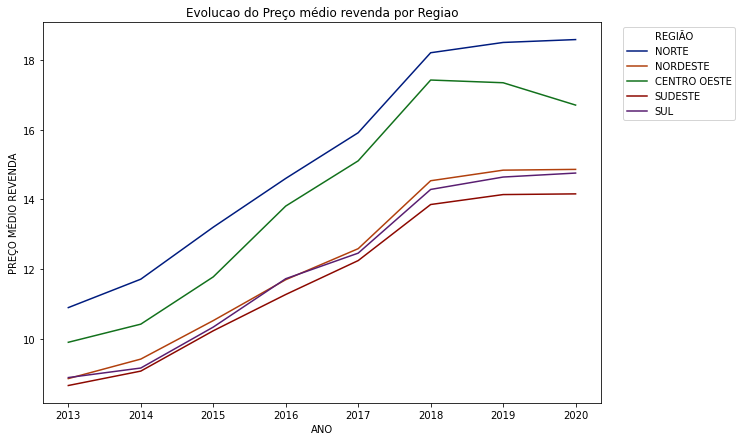

In [109]:
#Análise Gráfica - Ano x Preço médio de Revenda por Região

plt.figure(figsize=(10,7))

preço_regiao = sns.lineplot(x="ANO", y="PREÇO MÉDIO REVENDA", hue="REGIÃO",
                            ci = None, linestyle='solid',  palette= "dark", 
                            data=base_dados)

preço_regiao.set_title('Evolucao do Preço médio revenda por Regiao')

preço_regiao.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

* Conforme hipóteses levantadas, a Região Norte apresenta o maior Preço médio de revenda. Além disso, apresenta também a maior variação do período analisado.

* Conforme hipóteses levantadas, a Região Sudeste apresenta o menor Preço médio de revenda.

* Em 2013 e 2016, o Preço médio de revenda da Região Sul foi mais alto que o Preço médio de revenda da Região Nordeste.

* Conforme esperado, houve um aumento mais acentuado do Preço médio de revenda de 2017 para 2018, principalmente nas Regiões Norte e Centro-Oeste.

* Somente a Região Centro-Oeste apresentou uma queda no Preço médio de revenda, que ocorreu de 2019 para 2020. 

* O comportamento do Preço médio de revenda das Regiões Nordeste e Sudeste é bem similar.


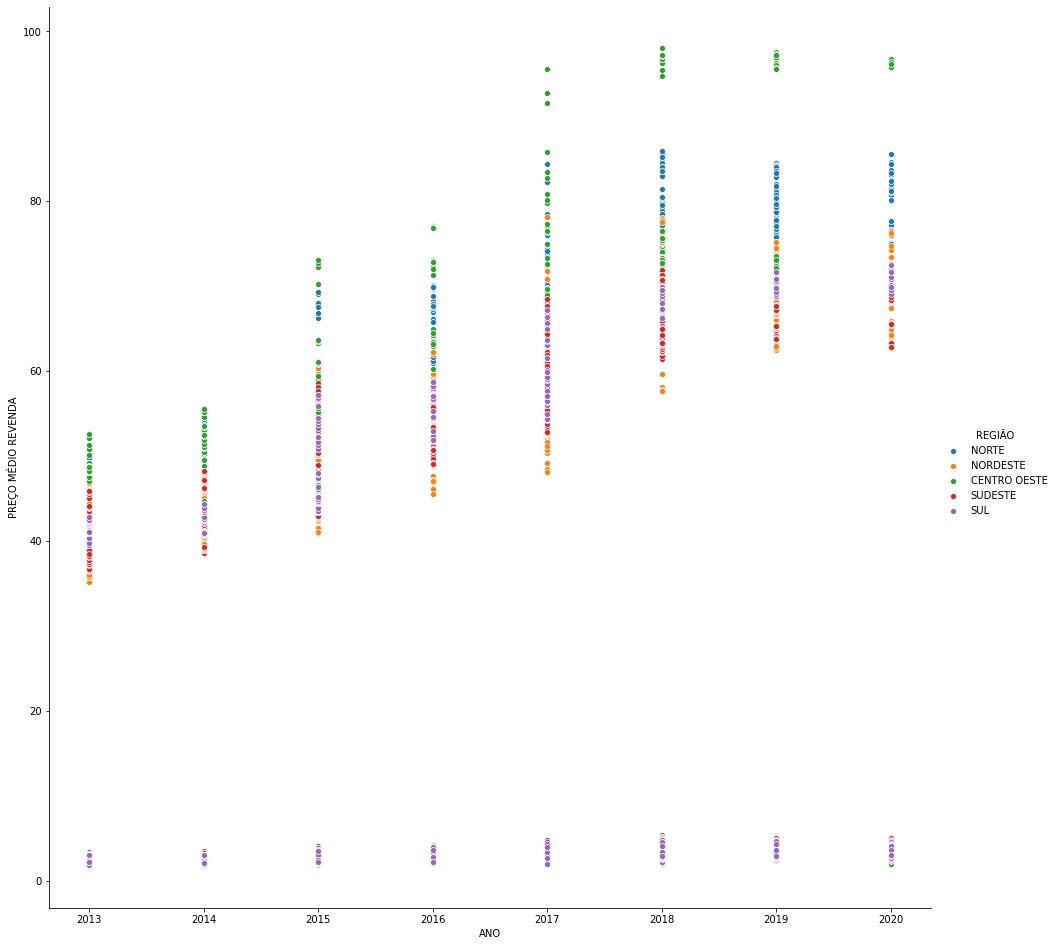

In [116]:
#Análise Gráfica - Gráfico de dispersão Ano x Preço por Região

dispersao = sns.pairplot(x_vars=["ANO"], y_vars=["PREÇO MÉDIO REVENDA"], data=base_dados, hue="REGIÃO", height=13)


* Em todos os anos analisados, a maioria dos menores valores para o Preço médio de revenda encontram-se na Região Sul. Os maiores valores de tal variável encomtram-se na Região Centro-Oeste.

* Ao longo dos anos, a dispersão do Preço médio de revenda aumenta sua amplitude. Visualmente, a maior amplitude ocorreu em 2018. 

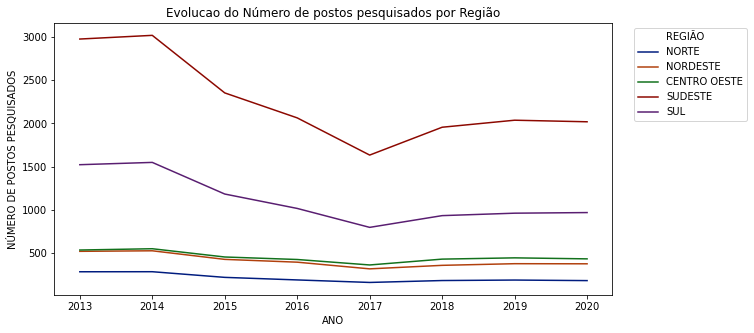

In [111]:
#Análise Gráfica - Número postos pesquisados por Região

plt.figure(figsize=(10,5))

preço_produto = sns.lineplot(x="ANO", y="NÚMERO DE POSTOS PESQUISADOS", 
                             hue="REGIÃO",ci = None, linestyle='solid', 
                             palette= "dark", data=base_dados)

preço_produto.set_title('Evolucao do Número de postos pesquisados por Região')

preço_produto.legend(loc='upper right', bbox_to_anchor=(1.25, 1) )

* Conforme hipóteses iniciais, a Região Sudeste possui o maior Número de postos analisados e a Região Norte possui o menor Número de postos analisados.

* No início do período, a Região Centro-Oeste e Região Nordeste possuiam o Número de postos analisados similares, além de apresentar um comportamento similar.

* A Região Norte apresenta um comportamento do Número de postos quase uniforme ao longo do período.

* Todas as regiões apresentam queda no Número de postos analisados ao longo do período, sendo a maior queda encontrada na Região Sudeste.

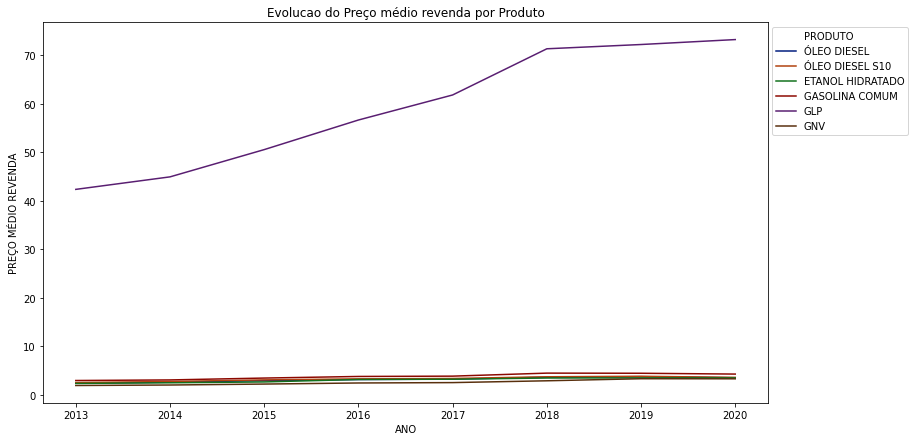

In [112]:
#Análise Gráfica - Preço médio de Revenda por Produto

plt.figure(figsize=(13,7))

preço_produto = sns.lineplot(x="ANO", y="PREÇO MÉDIO REVENDA", hue="PRODUTO",
                             ci = None, linestyle='solid',  palette= "dark", 
                             data=base_dados)

preço_produto.set_title('Evolucao do Preço médio revenda por Produto')

preço_produto.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

* Percebe-se que o produto responsável por evelar o valor do Preço médio de revenda é o GLP.

* O comportamento do Preço médio de revenda dos demais Produtos são similares e o valor máximo é de 5,50 reais.

* Conforme hipóteses iniciais, o Produto com menor Preço médio de revenda para veículos automotores é o GNV e a Gasolina Comum é o Produto com o maior Preço médio de revenda.

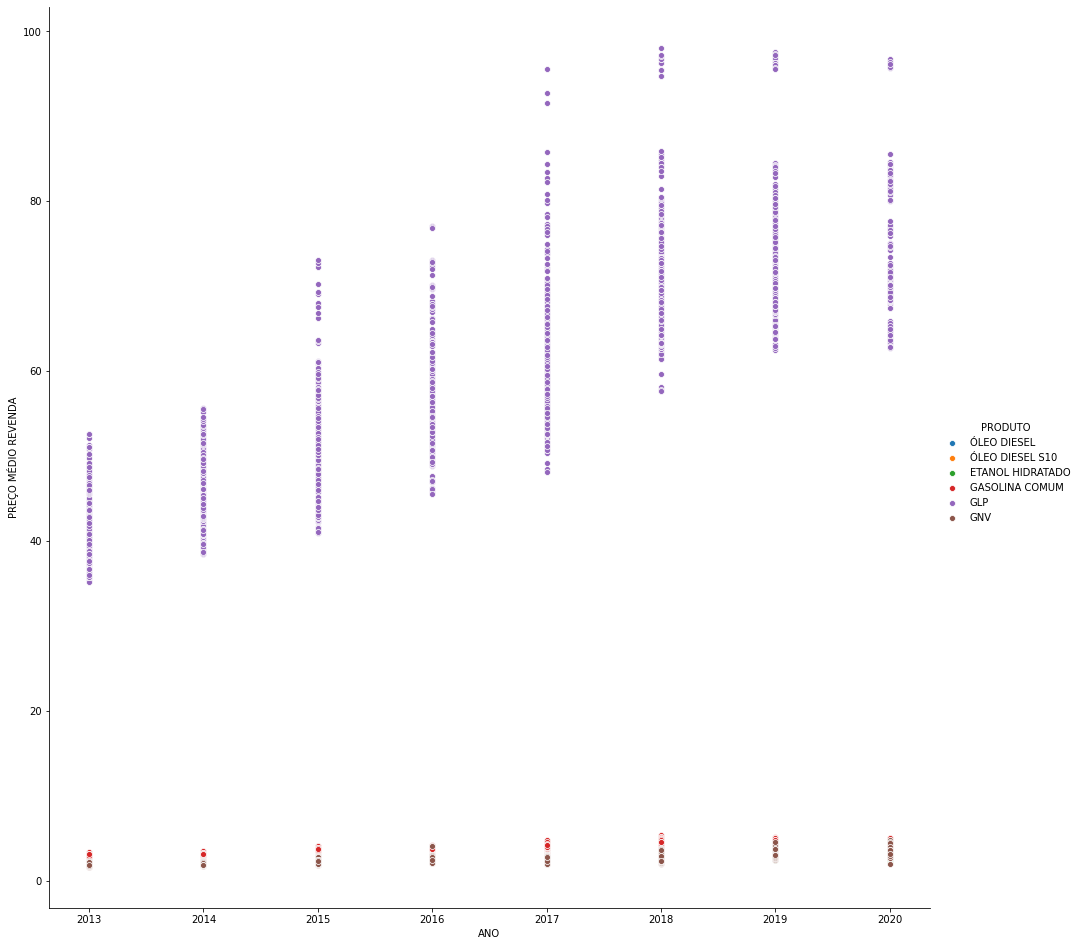

In [115]:
#Análise Gráfica - Gráfico de dispersão Ano x Preço por Produto

dispersao = sns.pairplot(x_vars=["ANO"], y_vars=["PREÇO MÉDIO REVENDA"], data=base_dados, hue="PRODUTO", height=13)

* A maior amplitude do Preço médio de revenda do Produto GLP ocorreu em 2017.

* A dispersão dos demais Produtos são bem similares. 

* O Produto GNV apresentou o menor valor do Preço médio de revenda em todos os anos analisados.

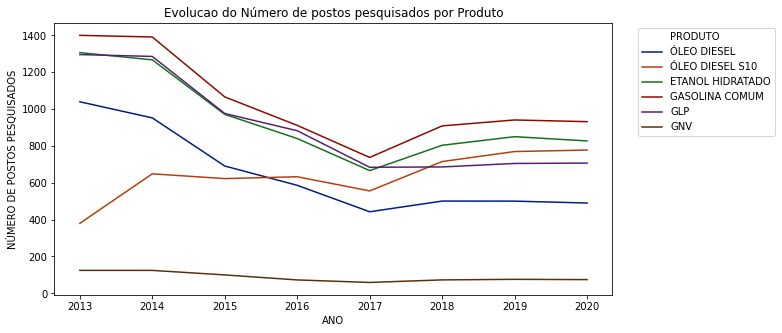

In [114]:
#Análise Gráfica - Número postos pesquisados por Produto

plt.figure(figsize=(10,5))

preço_produto = sns.lineplot(x="ANO", y="NÚMERO DE POSTOS PESQUISADOS", 
                             hue="PRODUTO",ci = None, linestyle='solid', 
                             palette= "dark", data=base_dados)

preço_produto.set_title('Evolucao do Número de postos pesquisados por Produto')

preço_produto.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

* O Número de postos que possuem GLP apresentou a maior queda no período analisado.

* O Número de postos que possuem Óleo Diesel S10 apresentou o maior aumento no período analisado.

* O comportamento do Número de postos que possuem Gasolina Comum e Etanol Hidratado é bem similar.

* O Óleo Diesel S10 superou o Número de postos que possuem Óleo Diesel e GLP ao longo do período.

# Conclusões e Insights

* Regiões Norte e Nordeste são potenciais regiões para realizar investimentos de entrada no mercado pois são as regiões com menos postos analisados.

* Região Nordeste possui o menor Preço médio de revenda em relação a Região Norte.

* Conforme hipóteses iniciais, o menor preço médio de revenda dos produtos encontra-se na Região Sudeste e uma possível explicação é o elevado número de postos analisados de tal região.

* O Produto GNV é o produto menos encontrado nos postos. 

* O Produto Gasolina Comum é o produto mais encontrado nos postos. 

* Mesmo com redução do Número de postos analisados, o Preço médio de revenda de todos os produtos apresentaram crescimento. Tal comportamento pode ser explicado pela influência da inflação do período, em conjunto com a Greve dos Caminhoneiros em 2018.

#Pesquisas Futuras e Limitações

* Comparar número de postos analisados com o número total de postos existentes
no mesmo período. ANP possui dados para esse tipo de análise apenas para o ano de 2019, conforme [este anuário disponível](http://dados.gov.br/dataset/t3-17-anuario-estatistico-2019-quantidade-de-postos-revendedores); 
* BoxPlot da variável Preço médio revenda ficou com difícil visualização pois a amplitude da variável citada é muito grande, corforme exposto nas análises da tabela de descrição estatística e gráfico de dispersão; 

#Obrigada pela atenção e oportunidade.


* Para demais informações: lucchesi.lara@outlook.com